In [17]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [18]:
n=100

In [19]:
x = torch.ones(n,4) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.0860,  1.0000,  1.0000,  1.0000],
        [ 0.2451,  1.0000,  1.0000,  1.0000],
        [-0.4217,  1.0000,  1.0000,  1.0000],
        [ 0.3588,  1.0000,  1.0000,  1.0000],
        [ 0.7766,  1.0000,  1.0000,  1.0000]])

In [20]:
x = torch.index_select(x, 1, torch.tensor([0,0,0,2]))

In [21]:
x[:,0].apply_(lambda a: 3*a**3)
x[:,1].apply_(lambda a: -2*a**2)
x[:5]

tensor([[ 0.0019, -0.0148,  0.0860,  1.0000],
        [ 0.0442, -0.1202,  0.2451,  1.0000],
        [-0.2250, -0.3557, -0.4217,  1.0000],
        [ 0.1386, -0.2575,  0.3588,  1.0000],
        [ 1.4051, -1.2062,  0.7766,  1.0000]])

In [22]:
a = tensor(3.,1.,2.,4.); a

tensor([3., 1., 2., 4.])

In [23]:
y = x@a + (torch.rand(n) * 6)

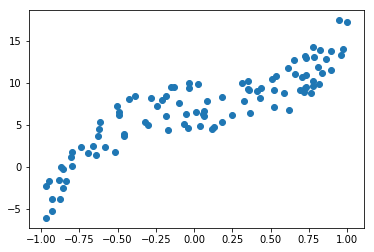

In [24]:
plt.scatter(x[:,2], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [25]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [26]:
a = tensor(-1.,1,-1,1)

In [27]:
y_hat = x@a
mse(y_hat, y)

tensor(88.0240)

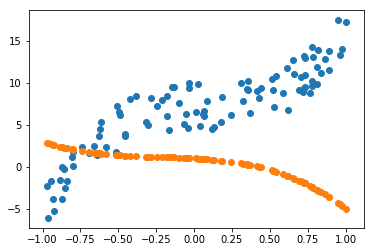

In [28]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [29]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1., -1.,  1.], requires_grad=True)

In [30]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

tensor(38.0524, grad_fn=<MeanBackward0>)
tensor(4.4561, grad_fn=<MeanBackward0>)


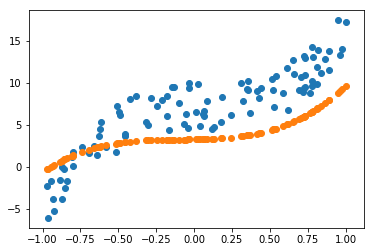

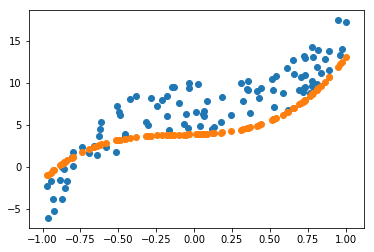

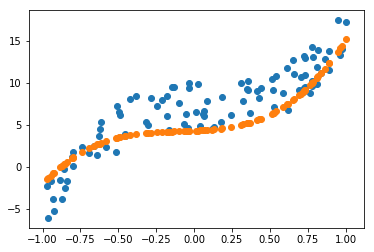

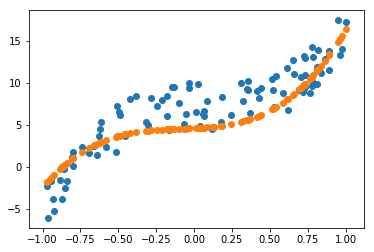

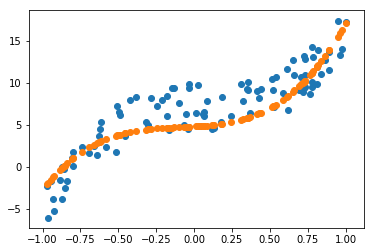

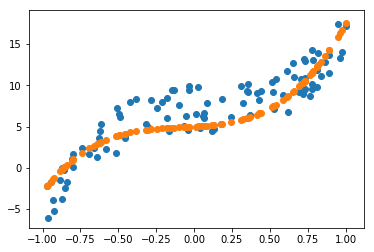

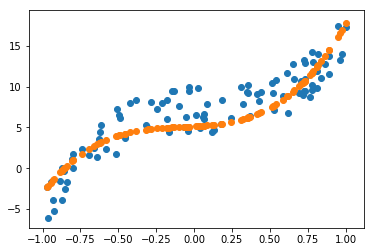

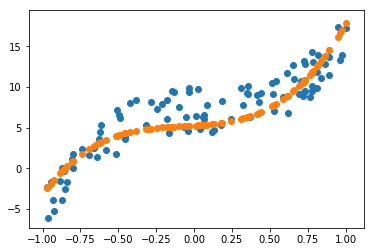

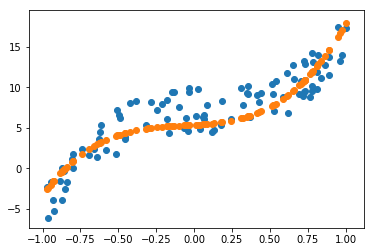

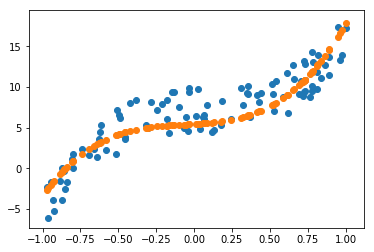

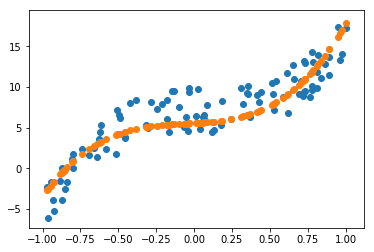

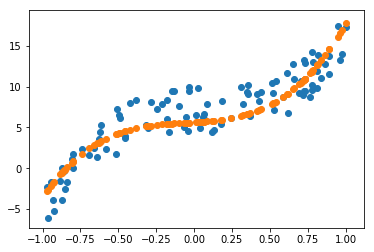

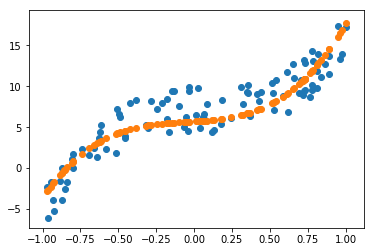

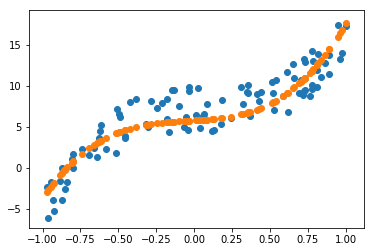

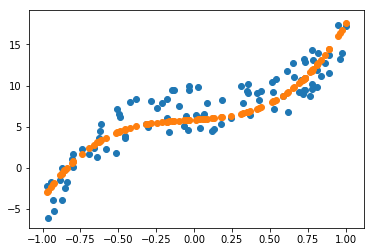

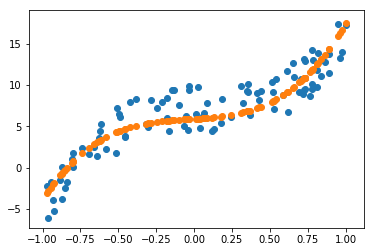

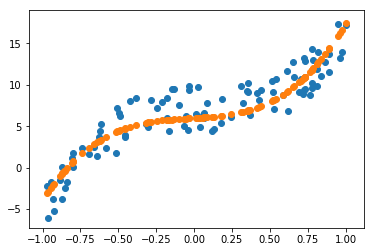

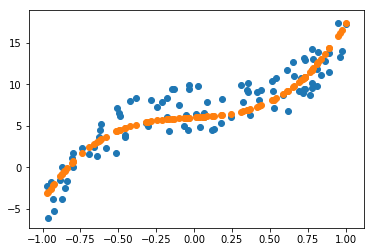

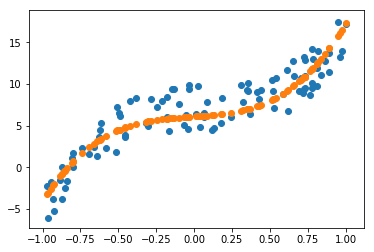

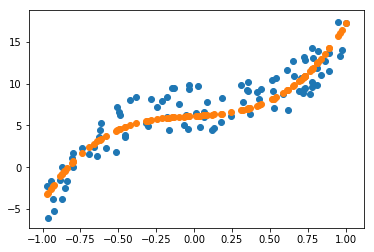

In [32]:
lr = 1e-1
for t in range(20):
    update()
    figure = plt.figure(t)
    plt.scatter(x[:,2],y)
    plt.scatter(x[:,2],x@a);
    figure.show()

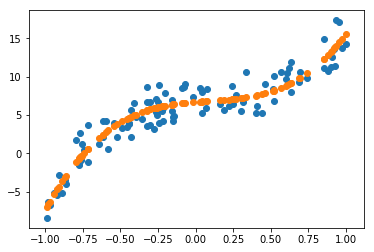

In [16]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],x@a);

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.